In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [11]:
df = pd.read_csv("sample_marketing_dataset.csv")

print("First 5 Rows:")
print(df.head(), "\n")

print("Last 5 Rows:")
print(df.tail(), "\n")

print("Dataset Info:")
print(df.info(), "\n")

print("Dataset Shape:", df.shape, "\n")

First 5 Rows:
   Age  Income  Previous_Response Channel  Response
0   25   45000                  1   Email         1
1   34   60000                  0     SMS         0
2   45   80000                  1   Email         1
3   23   32000                  0   Phone         0
4   36   55000                  1   Email         1 

Last 5 Rows:
   Age  Income  Previous_Response Channel  Response
5   50  120000                  1     SMS         1
6   32   60000                  0   Phone         0
7   42   70000                  1     SMS         1
8   27   45000                  1   Email         1
9   41   48000                  0   Phone         0 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                10 non-null     int64 
 1   Income             10 non-null     int64 
 2   Previous_Response  10 non-null     in

In [12]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features, "\n")

Numerical Features: ['Age', 'Income', 'Previous_Response', 'Response']
Categorical Features: ['Channel'] 



Missing Data:
 Age                  0
Income               0
Previous_Response    0
Channel              0
Response             0
dtype: int64 



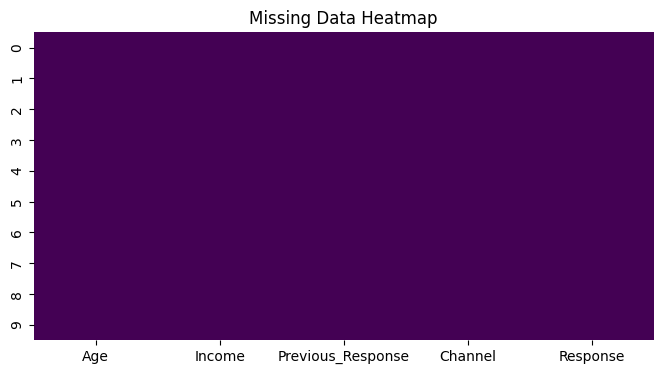

In [13]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data, "\n")

# Visualizing missing data (if any)
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

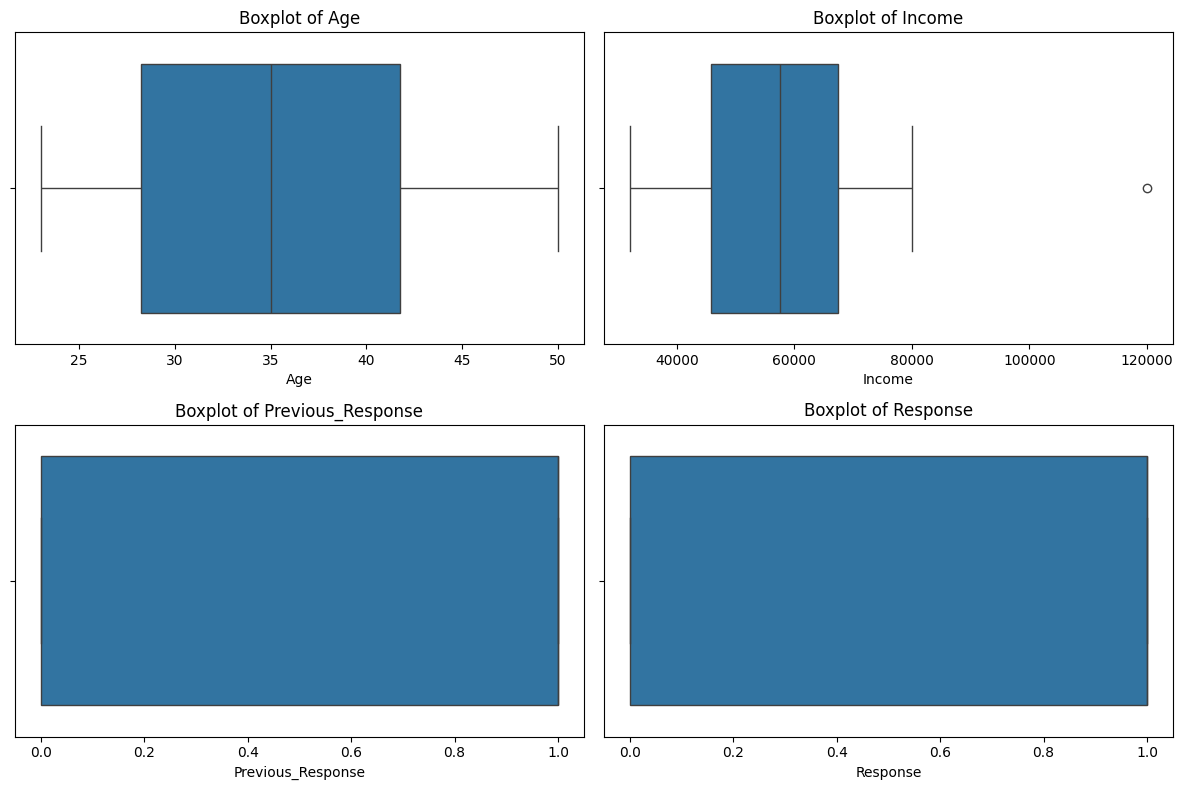

In [14]:
plt.figure(figsize=(12,8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [15]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column[(column < lower) | (column > upper)]

print("\nOutliers Detected Using IQR Method:")
for col in numerical_features:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {list(outliers.values)}")



Outliers Detected Using IQR Method:
Age: []
Income: [np.int64(120000)]
Previous_Response: []
Response: []


In [16]:
df_cleaned = df.copy()
df_cleaned[numerical_features] = df_cleaned[numerical_features].fillna(df_cleaned[numerical_features].median())

# Fill categorical missing with mode
for col in categorical_features:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum(), "\n")



Missing Values After Cleaning:
Age                  0
Income               0
Previous_Response    0
Channel              0
Response             0
dtype: int64 



In [17]:
df_final = df_cleaned.copy()

for col in numerical_features:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_final = df_final[(df_final[col] >= lower) & (df_final[col] <= upper)]

print("Shape Before Cleaning:", df_cleaned.shape)
print("Shape After Removing Outliers:", df_final.shape)

Shape Before Cleaning: (10, 5)
Shape After Removing Outliers: (9, 5)
